## Assignment 5A

### Problem 1 (100 points)
Consider the Schrodinger equation for a particle of mass m in the harmonic potential $V(x)=\dfrac{V_0}{a^2}x^2$:
$$-\dfrac{1}{2}\dfrac{d^2}{dx^2}\psi(x)+V(x)\psi(x)=E\psi(x)$$
where $V_0$ and $a$ are constants.

After converting this second-order equation into a 2-dimensional first-order equation, write a program to solve this system using the shooting method and the 4th-order Runge-Kutta (RK4) method.

As explained in class, you will need to write a program to find the energies, starting with an initial guess for the energy and use a root-finding method to refine the guess until you find accurate values.

We can convert the system into the following:
$$\dfrac{d^2\psi(x)}{dx^2}=2(V(x)-E)\psi(x)$$
Writing it as a system of first order, we get:
$$\begin{align}
\dfrac{d\psi(x)}{dx}&=\phi(x)\\
\dfrac{d\phi(x)}{dx}&=2(V(x)-E)\psi(x)
\end{align}$$

The external conditions would require that:
$$\lim_{x\rightarrow \pm Na}\psi(x)=0$$
Which we'll extend for larger values of $N$ to recover the true wavefunction later.

#### Problem 1.A (30 points)
Start from one of the boundaries — in a similar fashion as in the example of the infinite square well, discussed in class. Set the value of $N$, controlling the size of the box, to be sufficiently large that the eigenfunctions and eigenvalues you aim to calculate are converged to satisfactory accuracy. Start from $N = 2$, then $N = 3, 4, $ etc... What happens?
- What’s the the problem you observe if N is too small?
- What’s the problem you observe if N is too large?
- Why are the so-obtained wavefunctions very large in absolute value (before to be normalized,
as asked below in point c)?

0.35358452711159094
[0.3535533905932738, 1.0606601717798214, 1.7677669529663689, 2.4748737341529163, 3.1819805153394642, 3.8890872965260117, 4.59619407771256, 5.303300858899107, 6.0104076400856545, 6.7175144212722016]


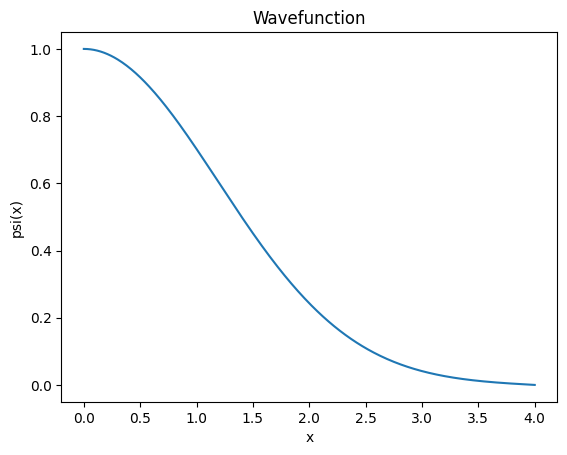

In [ ]:
import numpy as np

def continuous_runge_kutta_method_function(
    f: callable,
    t0: float | int,
    x0: float | int | np.ndarray | tuple | list,
    dt: float | int,
    tf: float | int
) -> tuple[np.ndarray, np.ndarray]:
    """
    Runge-Kutta Method for solving ordinary differential equations.
    This function solves the ODE using the Runge-Kutta Method and returns the time and value arrays.
    
    Parameters:
        f: callable - The function equal to the derivative of the unknown function
        t0: float | int - The initial time
        x0: float | int - The initial value(s)
        dt: float | int - The time step
        tf: float | int - The final time

    Returns:
        tuple[np.ndarray, np.ndarray] - The time and value arrays
    """

    # Input Checking
    assert callable(f)
    assert isinstance(t0, (int, float))
    assert isinstance(x0, (int, float, np.ndarray, tuple, list))
    assert isinstance(dt, (int, float))
    assert isinstance(tf, (int, float))

    # Implementation
    T = np.arange(t0, tf+dt, dt)
    x = [x0]
    for t in T[:-1]:
        k1 = f(t       , x[-1]          )
        k2 = f(t + dt/2, x[-1] + k1*dt/2)
        k3 = f(t + dt/2, x[-1] + k2*dt/2)
        k4 = f(t + dt  , x[-1] + k3*dt  )
        x.append(x[-1] + (k1 + 2*k2 + 2*k3 + k4)*dt/6)
    return T, x
def continuous_secant_method_value(*,
    f: callable, 
    x0: int | float, 
    x1: int | float, 
    error: int | float, 
    max_iter: int
) -> float:
    """
    Secant Method for Continuous Functions (Single Variable)
    Returns the value of x that is the root of the function

    Parameters
    ----------
    f : callable
        The function to find the root of
    x0 : int | float
        The first guess of the root
    x1 : int | float
        The second guess of the root
    error : int | float
        The error tolerance
    max_iter : int
        The maximum number of iterations

    Returns
    -------
    float
        The value of x that is the root of the function
    """

    # Type Checking
    assert callable(f)
    assert isinstance(x0, (int, float))
    assert isinstance(x1, (int, float))
    assert x0 != x1, "Guesses x0 and x1 cannot be the same"
    assert isinstance(error, (int, float))
    assert error > 0
    assert isinstance(max_iter, int)
    assert max_iter > 0

    # Implementation
    for _ in range(max_iter):
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if np.abs(x2 - x1) < error:
            return x2
        x0, x1 = x1, x2
    else:
        return x2


# Problem Parameters
V0, A = 1, 2
V: callable = lambda x: V0 * x**2 / A**2
N = 2
E = 2
x0: float = 0
psi0: np.ndarray = np.array([1, 0])

# Wavefunction ODE
minimized_energy = continuous_secant_method_value(
    f=lambda E: continuous_runge_kutta_method_function(
        lambda x, psi: np.array([psi[1], 2*(V(x)-E)*psi[0]]),
        t0=x0, x0=psi0, dt=0.01, tf=N*A
    )[1][-1][0],
    x0=0.1,
    x1=0.4,
    error=1e-6,
    max_iter=1000
)
print(minimized_energy)

# Find the wavefunction
val = continuous_runge_kutta_method_function(
    f=lambda x, psi: np.array([psi[1], 2*(V(x)-minimized_energy)*psi[0]]),
    t0=x0, x0=psi0, dt=0.01, tf=N*A
)

# Analytical Solution
true_energies = [float((0.5+n)*np.sqrt(2*V0)/A) for n in range(10)]
print(true_energies)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(val[0], [v[0] for v in val[1]])
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.title("Wavefunction")
plt.show()

